In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = "dataset_source.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df_info = df.info()
df_head = df.head()


df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   injuries_direct   761 non-null    int64  
 1   deaths_direct     761 non-null    int64  
 2   event_latitude    761 non-null    float64
 3   event_longitude   761 non-null    float64
 4   event_range       761 non-null    float64
 5   event_type        761 non-null    object 
 6   event_begin_time  761 non-null    object 
 7   event_end_time    761 non-null    object 
 8   damage_property   761 non-null    int64  
 9   source            761 non-null    object 
 10  rn                761 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 65.5+ KB


,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_type,event_begin_time,event_end_time,damage_property,source,rn
count,761.000000,761.000000,761.000000,761.000000,761.000000,761,761,761,7.610000e+02,761,761.000000
unique,NaN,NaN,NaN,NaN,NaN,4,449,449,NaN,30,NaN
top,NaN,NaN,NaN,NaN,NaN,flash flood,2024-07-10T21:30:00,2023-01-01T23:59:00,NaN,NWS Storm Survey,NaN
freq,NaN,NaN,NaN,NaN,NaN,200,10,13,NaN,223,NaN
mean,2.721419,0.629435,35.747277,-89.650005,2.655440,NaN,NaN,NaN,1.545455e+07,NaN,96.374507
std,6.361370,1.299545,6.099935,17.587892,3.083233,NaN,NaN,NaN,1.071591e+08,NaN,56.148045
min,0.000000,0.000000,7.360600,-124.120000,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,1.000000
25%,0.000000,0.000000,33.000000,-97.096600,0.910000,NaN,NaN,NaN,0.000000e+00,NaN,48.000000
50%,1.000000,0.000000,36.180000,-89.150000,1.820000,NaN,NaN,NaN,1.500000e+04,NaN,96.000000
75%,2.000000,1.000000,39.087400,-81.810000,3.150000,NaN,NaN,NaN,8.500000e+05,NaN,143.000000


In [4]:
# Load the dataset
file_path = "dataset_source.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df_info = df.info()
df_head = df.head()


df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   injuries_direct   761 non-null    int64  
 1   deaths_direct     761 non-null    int64  
 2   event_latitude    761 non-null    float64
 3   event_longitude   761 non-null    float64
 4   event_range       761 non-null    float64
 5   event_type        761 non-null    object 
 6   event_begin_time  761 non-null    object 
 7   event_end_time    761 non-null    object 
 8   damage_property   761 non-null    int64  
 9   source            761 non-null    object 
 10  rn                761 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 65.5+ KB


,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_type,event_begin_time,event_end_time,damage_property,source,rn
count,761.000000,761.000000,761.000000,761.000000,761.000000,761,761,761,7.610000e+02,761,761.000000
unique,NaN,NaN,NaN,NaN,NaN,4,449,449,NaN,30,NaN
top,NaN,NaN,NaN,NaN,NaN,flash flood,2024-07-10T21:30:00,2023-01-01T23:59:00,NaN,NWS Storm Survey,NaN
freq,NaN,NaN,NaN,NaN,NaN,200,10,13,NaN,223,NaN
mean,2.721419,0.629435,35.747277,-89.650005,2.655440,NaN,NaN,NaN,1.545455e+07,NaN,96.374507
std,6.361370,1.299545,6.099935,17.587892,3.083233,NaN,NaN,NaN,1.071591e+08,NaN,56.148045
min,0.000000,0.000000,7.360600,-124.120000,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,1.000000
25%,0.000000,0.000000,33.000000,-97.096600,0.910000,NaN,NaN,NaN,0.000000e+00,NaN,48.000000
50%,1.000000,0.000000,36.180000,-89.150000,1.820000,NaN,NaN,NaN,1.500000e+04,NaN,96.000000
75%,2.000000,1.000000,39.087400,-81.810000,3.150000,NaN,NaN,NaN,8.500000e+05,NaN,143.000000


In [5]:
# Convert time columns to datetime
df['event_begin_time'] = pd.to_datetime(df['event_begin_time'])
df['event_end_time'] = pd.to_datetime(df['event_end_time'])

# Calculate event_duration in minutes
df['event_duration'] = (df['event_end_time'] - df['event_begin_time']).dt.total_seconds() / 60

# Convert event_range to float (if not already)
df['event_range'] = df['event_range'].astype(float)

# Drop the 'rn' column
df.drop(columns=['rn'], inplace=True)

# One-hot encode 'event_type'
df = pd.get_dummies(df, columns=['event_type'], prefix='event')
df = pd.get_dummies(df, columns=['source'], prefix='source')

In [6]:
df.head()

,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_begin_time,event_end_time,damage_property,event_duration,event_flash flood,...,source_NWS Storm Survey,source_Newspaper,source_OFFICIAL NWS OBS.,source_Other Federal Agency,source_Park/Forest Service,source_Public,source_Social Media,source_State Official,source_TRAINED SPOTTER,source_Trained Spotter
0,5,0,35.2174,-111.7912,2.36,2024-10-18 07:00:00,2024-10-18 07:10:00,0,10.0,False,...,False,False,False,False,False,False,False,False,False,False
1,5,0,35.1951,-111.7083,3.31,2024-10-18 07:00:00,2024-10-18 07:10:00,0,10.0,False,...,False,False,False,False,False,False,False,False,False,False
2,2,0,43.2988,-111.1497,5.00,2024-08-10 12:36:00,2024-08-10 12:50:00,0,14.0,False,...,False,False,False,False,False,True,False,False,False,False
3,4,0,43.3091,-111.1637,4.00,2024-08-10 12:35:00,2024-08-10 12:45:00,0,10.0,False,...,False,False,False,False,False,True,False,False,False,False
4,3,0,43.9100,-116.8100,4.18,2024-06-26 13:00:00,2024-06-26 13:10:00,0,10.0,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.columns.tolist()

['injuries_direct',
 'deaths_direct',
 'event_latitude',
 'event_longitude',
 'event_range',
 'event_begin_time',
 'event_end_time',
 'damage_property',
 'event_duration',
 'event_flash flood',
 'event_hail',
 'event_thunderstorm wind',
 'event_tornado',
 'source_911 Call Center',
 'source_AMATEUR RADIO',
 'source_ASOS',
 'source_Amateur Radio',
 'source_Broadcast Media',
 'source_COOP Observer',
 'source_CoCoRaHS',
 'source_County Official',
 'source_Department of Highways',
 'source_EMERGENCY MANAGER',
 'source_Emergency Manager',
 'source_FIRE DEPT/RESCUE SQUAD',
 'source_Fire Department/Rescue',
 'source_GENERAL PUBLIC',
 'source_LAW ENFORCEMENT',
 'source_Law Enforcement',
 'source_Local Official',
 'source_NEWSPAPER',
 'source_NWS Employee',
 'source_NWS STORM SURVEY',
 'source_NWS Storm Survey',
 'source_Newspaper',
 'source_OFFICIAL NWS OBS.',
 'source_Other Federal Agency',
 'source_Park/Forest Service',
 'source_Public',
 'source_Social Media',
 'source_State Official',
 'sou

# Data Visualization

In [8]:
# Filter for flash flood events
df_flashflood = df[df['event_hail'] == 1].copy()

source_cols = [col for col in df_flashflood.columns if col.startswith('source_')]

# Drop source columns that are all zeros for that row (i.e., retain only true sources)
df_flashflood_filtered = df_flashflood[df_flashflood[source_cols].sum(axis=1) > 0].copy()

# Now drop all event and irrelevant columns
X_flood = df_flashflood_filtered.drop(columns=[
    'damage_property',
    'event_begin_time',
    'event_end_time',
    'event_tornado',
    'event_hail',
    'event_flash flood',
    'event_thunderstorm wind'
] + [col for col in source_cols if df_flashflood_filtered[col].nunique() == 1 and df_flashflood_filtered[col].iloc[0] == 0])

df_flashflood['damage_property_log'] = np.log1p(df_flashflood['damage_property'])
y_flood = df_flashflood['damage_property_log']
# Prepare features and target
# X_flood = df_flashflood.drop(columns=['damage_property','event_begin_time', 'event_end_time', 'event_tornado', 'event_hail', 'event_flash flood', 'event_thunderstorm wind'])
#y_flood = df_flashflood['damage_property']
# y_flood = np.log1p(df_flashflood['damage_property'])  # to reduce scale issues

# Split and scale
X_train_flood, X_test_flood, y_train_flood, y_test_flood = train_test_split(X_flood, y_flood, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled_flood = pd.DataFrame(scaler.fit_transform(X_train_flood), columns=X_flood.columns, index=X_train_flood.index)
X_test_scaled_flood = pd.DataFrame(scaler.transform(X_test_flood), columns=X_flood.columns, index=X_test_flood.index)

Since, damage cost column contains values from 0 to 500000000. We convert the outcome into a log value and predict the log value

In [9]:
np.max(df_flashflood['damage_property'])

1800000000

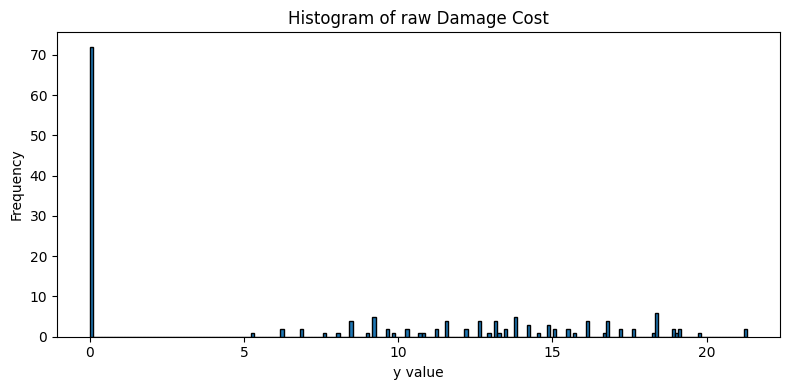

In [10]:
plt.figure(figsize=(8, 4))
plt.hist(df_flashflood['damage_property_log'], bins=200, edgecolor='k')
plt.xlabel('y value')
plt.ylabel('Frequency')
plt.title('Histogram of raw Damage Cost')
plt.tight_layout()
plt.show()

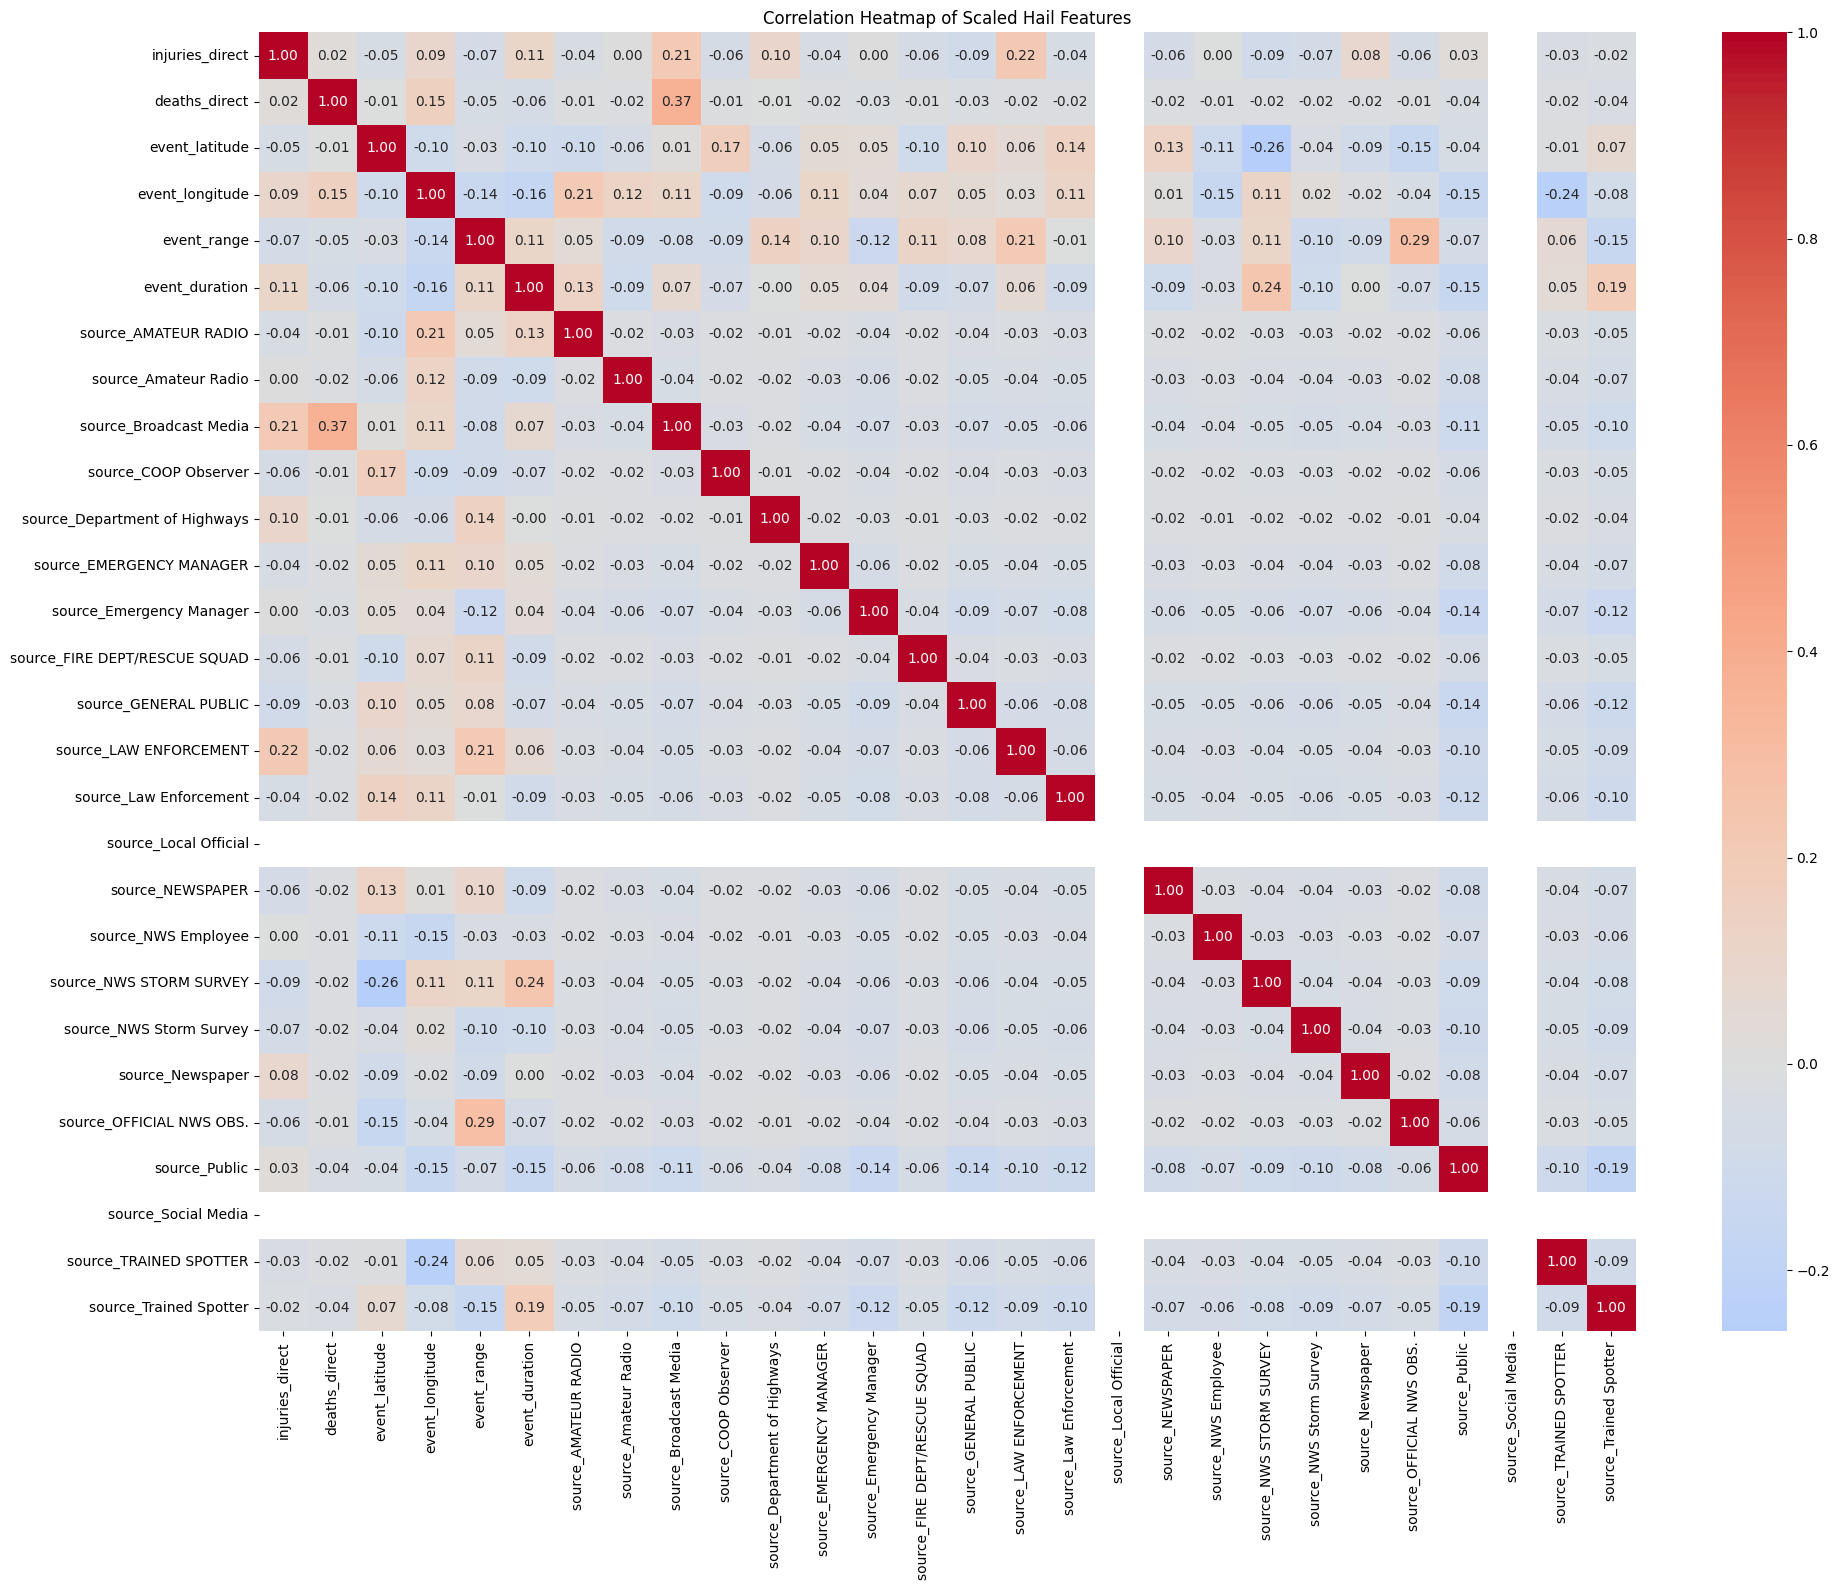

In [11]:
# Compute correlation matrix
corr_matrix = X_train_scaled_flood.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Scaled Hail Features")
plt.tight_layout()
plt.show()

# Linear Regression and Random Forest Regressor

In [12]:
# Initialize and train tornado models
tornado_models = {
    "Linear Regression (Hail)": LinearRegression(),
    "Random Forest Regressor (Hail)": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate
results_tornado = []
for name, model in tornado_models.items():
    model.fit(X_train_scaled_flood, y_train_flood)
    preds = model.predict(X_test_scaled_flood)
    rmse_tornado = np.sqrt(mean_squared_error(y_test_flood, preds))
    r2_tornado = r2_score(y_test_flood, preds)
    results_tornado.append({
        "Model": name,
        "RMSE": rmse_tornado,
        "R² Score": r2_tornado
    })

# Show results
results_tornado_df = pd.DataFrame(results_tornado)
print(results_tornado_df)


                            Model      RMSE  R² Score
0        Linear Regression (Hail)  8.668422 -0.796127
1  Random Forest Regressor (Hail)  6.646847 -0.056059


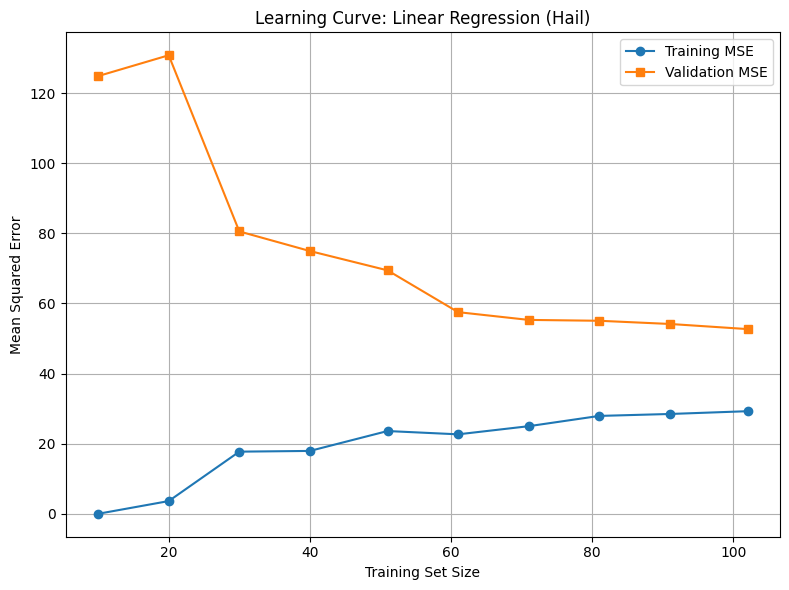

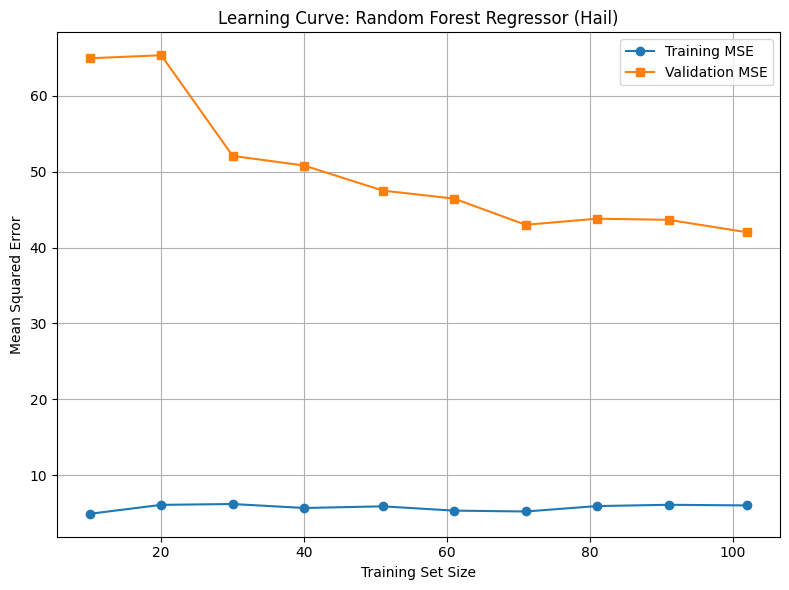

In [13]:
# Plot learning curves using MSE for tornado models
for name, model in tornado_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train_scaled_flood,  # Tornado features
        y=y_train_flood,         # Tornado target
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # Convert negative MSE to positive values
    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mse_mean, label="Training MSE", marker='o')
    plt.plot(train_sizes, test_mse_mean, label="Validation MSE", marker='s')
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


                          Model     RMSE  R² Score
Random Forest Regressor (Hails) 6.646847 -0.056059


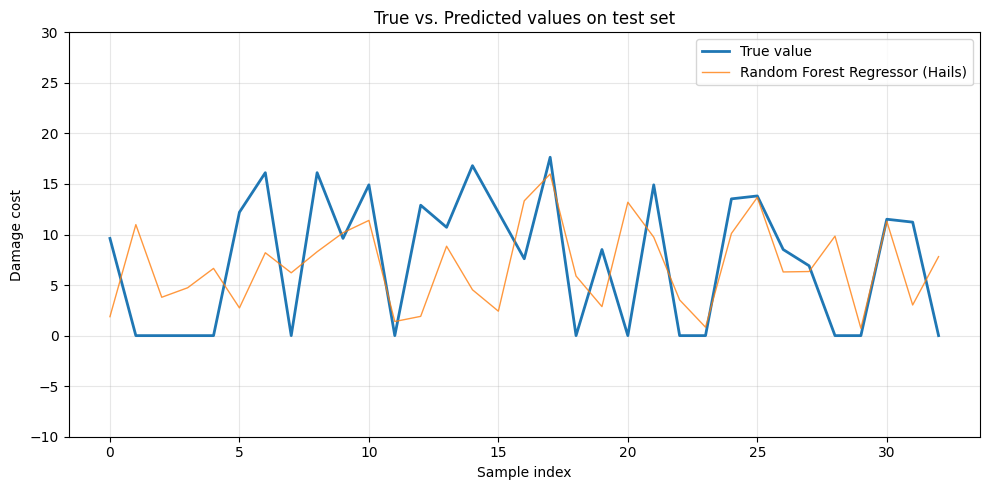

In [16]:
tornado_models = {
    "Random Forest Regressor (Hails)": RandomForestRegressor(
        n_estimators=100, random_state=42
    ),
}

pred_dict = {}          # store predictions for later plotting
results_tornado = []    # store metrics for a quick table

for name, model in tornado_models.items():
    model.fit(X_train_scaled_flood, y_train_flood)
    preds = model.predict(X_test_scaled_flood)

    # Save for plotting
    pred_dict[name] = preds

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test_flood, preds))
    r2   = r2_score(y_test_flood, preds)

    results_tornado.append({"Model": name, "RMSE": rmse, "R² Score": r2})

# Neat metrics table in case you need it
results_tornado_df = pd.DataFrame(results_tornado)
print(results_tornado_df.to_string(index=False))


plt.figure(figsize=(10, 5))

# Ground‑truth
plt.plot(
    y_test_flood.values,
    label="True value",
    linewidth=2,
)

# Each model’s curve
for name, preds in pred_dict.items():
    plt.plot(
        preds,
        linewidth=1,
        alpha=0.8,
        label=name,        # legend entry
    )

plt.ylim(-10, 30)                 # keep your original y‑axis limits
plt.xlabel("Sample index")
plt.ylabel("Damage cost")
plt.title("True vs. Predicted values on test set")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# SAve the model
rf_model = tornado_models["Random Forest Regressor (Flash Floods)"]

#joblib.dump(rf_model, "models/random_forest_tornado_hail.pkl")   # any filename you like


KeyError: 'Random Forest Regressor (Flash Floods)'

# Neural Network Regression

In [17]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_t = torch.tensor(X_train_scaled_flood.values, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_scaled_flood.values,  dtype=torch.float32)

# scale the target (z‑score)
#y_scaler     = StandardScaler()
##y_train_z    = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
#y_test_z     = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

y_train_t = torch.tensor(y_train_flood.values, dtype=torch.float32).unsqueeze(1)
y_test_t  = torch.tensor(y_test_flood.values, dtype=torch.float32).unsqueeze(1)

ds_full = TensorDataset(X_train_t, y_train_t)

# Validation split  (80 % train / 20 % val)
val_frac = 0.2
val_size = int(len(ds_full) * val_frac)
train_size = len(ds_full) - val_size
ds_train, ds_val = random_split(ds_full, [train_size, val_size],
                                generator=torch.Generator().manual_seed(42))

loader_train = DataLoader(ds_train, batch_size=16, shuffle=True)
loader_val   = DataLoader(ds_val,   batch_size=64, shuffle=False)

In [25]:
class MLPRegressor(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)        # linear output (z‑score of y)
        )

    def forward(self, x):
        return self.net(x)

model = MLPRegressor(X_train_t.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)


best_val = np.inf
patience, patience_cnt = 20, 0
n_epochs = 500
step = 0
training_loss = []
val_loss_list = []
for epoch in range(1, n_epochs + 1):
    # --- training step ---
    model.train()
    for xb, yb in loader_train:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        step +=1
        print(f"Epoch: {epoch}, Training Loss step:{step}-MSE:{loss}")
        training_loss.append(loss)

    # --- validation ---
    model.eval()
    with torch.no_grad():
        val_losses = []
        for xb, yb in loader_val:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            val_losses.append(criterion(pred, yb).item())
        val_loss = np.mean(val_losses)
        val_loss_list.append(val_loss)
        

    # early‑stopping logic
    # if val_loss < best_val - 0.0001:
    #     best_val = val_loss
    #     best_state = model.state_dict()
    #     patience_cnt = 0
    # else:
    #     patience_cnt += 1
    #     if patience_cnt >= patience:
    #         print(f"Early stopping at epoch {epoch}")
    #         break


Epoch: 1, Training Loss step:1-MSE:122.84001159667969
Epoch: 1, Training Loss step:2-MSE:109.02497863769531
Epoch: 1, Training Loss step:3-MSE:43.138526916503906
Epoch: 1, Training Loss step:4-MSE:152.09983825683594
Epoch: 1, Training Loss step:5-MSE:114.0405044555664
Epoch: 1, Training Loss step:6-MSE:117.1335678100586
Epoch: 1, Training Loss step:7-MSE:80.64572143554688
Epoch: 2, Training Loss step:8-MSE:119.42391204833984
Epoch: 2, Training Loss step:9-MSE:77.15353393554688
Epoch: 2, Training Loss step:10-MSE:159.32867431640625
Epoch: 2, Training Loss step:11-MSE:86.94934844970703
Epoch: 2, Training Loss step:12-MSE:104.22735595703125
Epoch: 2, Training Loss step:13-MSE:93.92305755615234
Epoch: 2, Training Loss step:14-MSE:73.23209381103516
Epoch: 3, Training Loss step:15-MSE:112.37142944335938
Epoch: 3, Training Loss step:16-MSE:89.89241790771484
Epoch: 3, Training Loss step:17-MSE:97.46321105957031
Epoch: 3, Training Loss step:18-MSE:107.21189880371094
Epoch: 3, Training Loss step

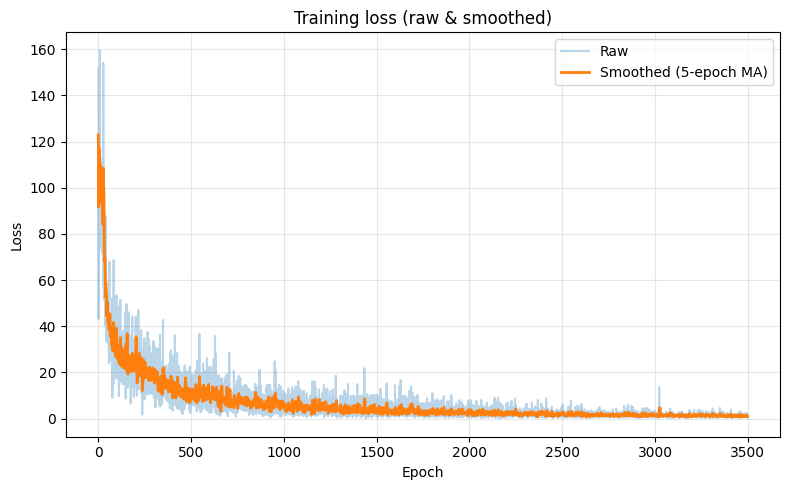

In [26]:
# loss_list may contain CUDA tensors → turn each into a Python float
loss_cpu_training = [float(l.detach().cpu()) if torch.is_tensor(l) else float(l)
            for l in training_loss]

# ── basic curve ─────────────────────────────────────────────────────────
# plt.figure(figsize=(8, 5))
# plt.plot(loss_cpu_training, label='Training loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.title('Training loss vs. epoch')
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # ── optional: add a 5‑epoch rolling‑average smoother ───────────────────
smooth = pd.Series(loss_cpu_training).rolling(window=5, min_periods=1).mean()
plt.figure(figsize=(8, 5))
plt.plot(loss_cpu_training,  alpha=0.3, label='Raw')
plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

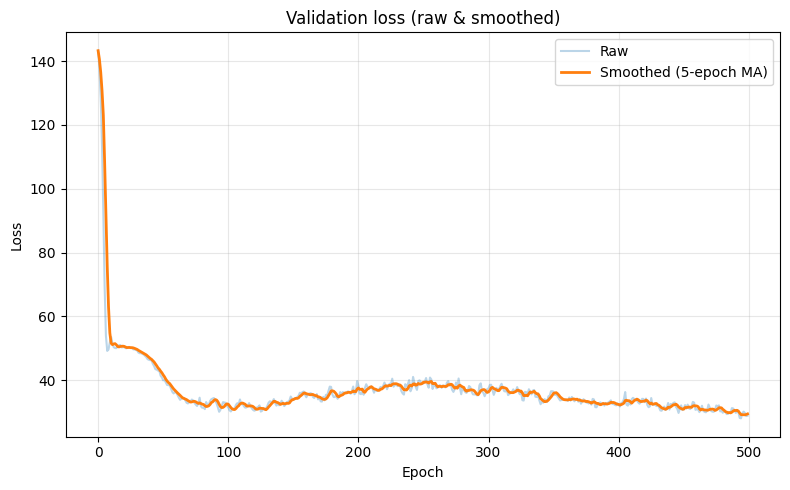

In [27]:
# loss_list may contain CUDA tensors → turn each into a Python float
loss_cpu_val = [float(l.detach().cpu()) if torch.is_tensor(l) else float(l)
            for l in val_loss_list]

# ── basic curve ─────────────────────────────────────────────────────────
# plt.figure(figsize=(8, 5))
# plt.plot(loss_cpu_training, label='Training loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.title('Training loss vs. epoch')
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # ── optional: add a 5‑epoch rolling‑average smoother ───────────────────
smooth = pd.Series(loss_cpu_val).rolling(window=5, min_periods=1).mean()
plt.figure(figsize=(8, 5))
plt.plot(loss_cpu_val,  alpha=0.3, label='Raw')
plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
loss_cpu_val

[143.2284698486328,
 137.81353759765625,
 128.42738342285156,
 113.45722198486328,
 92.3926773071289,
 69.5259017944336,
 53.86888122558594,
 49.18877029418945,
 49.66145324707031,
 51.842288970947266,
 53.540008544921875,
 51.52516174316406,
 50.343318939208984,
 50.09257125854492,
 50.06611251831055,
 50.766571044921875,
 50.946678161621094,
 51.04546356201172,
 50.31507873535156,
 50.33121871948242,
 50.43541717529297,
 50.06507110595703,
 50.04088592529297,
 50.39194107055664,
 50.43937301635742,
 50.113319396972656,
 50.09756851196289,
 49.66896438598633,
 49.65843963623047,
 49.51353454589844,
 49.33674621582031,
 48.659912109375,
 48.47259521484375,
 48.482879638671875,
 48.28047180175781,
 48.04706573486328,
 47.66402053833008,
 47.24129867553711,
 46.61570358276367,
 46.41259765625,
 46.28902816772461,
 46.29378890991211,
 45.19084930419922,
 44.45450973510742,
 43.45867156982422,
 43.34608459472656,
 43.021488189697266,
 43.04833984375,
 41.43204116821289,
 40.882266998291016

In [29]:
# model.load_state_dict(best_state)

# ── 4.  Evaluate on the test set ─────────────────────────────────────────
model.eval()
with torch.no_grad():
    preds_z = model(X_test_t.to(device)).cpu().numpy().ravel()

#preds = y_scaler.inverse_transform(preds_z.reshape(-1, 1)).ravel()

rmse_nn = np.sqrt(mean_squared_error(y_test_flood, preds_z))
r2_nn   = r2_score(y_test_flood, preds)

print(f"PyTorch NN  RMSE: {rmse_nn:,.2f}   R²: {r2_nn:.3f}")

# ── 5.  Add to your results list ─────────────────────────────────────────
results_tornado.append({
    "Model": "Neural Network (PyTorch, Tornado)",
    "RMSE":  rmse_nn,
    "R² Score": r2_nn
})

PyTorch NN  RMSE: 10.26   R²: -0.056


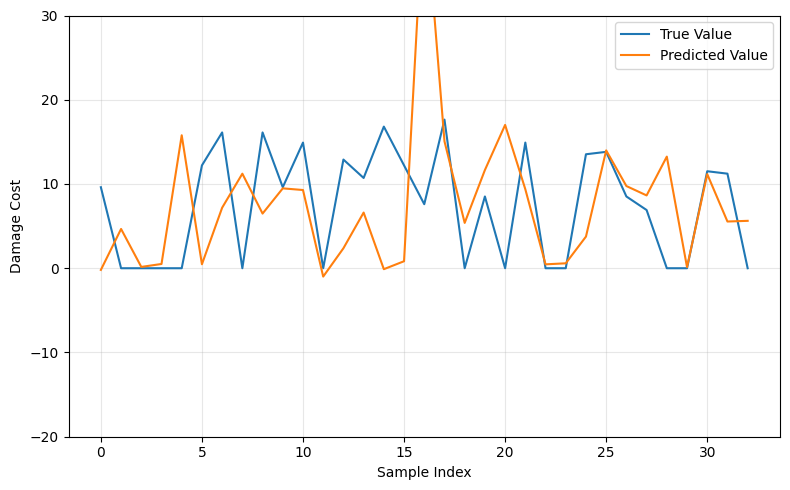

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(y_test_flood.values,  label='True Value')
plt.plot(preds_z,  label='Predicted Value')
plt.ylim(-20, 30)  
#plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Sample Index')
plt.ylabel('Damage Cost')
#plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# at the end of training, after your loop:
#torch.save(model.state_dict(), "Models/mlp_regressor_state_dict_flash_flood.pth")

# XGA Boost Regressor

In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [33]:
X_train_scaled_flood

,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_duration,source_AMATEUR RADIO,source_Amateur Radio,source_Broadcast Media,source_COOP Observer,...,source_NEWSPAPER,source_NWS Employee,source_NWS STORM SURVEY,source_NWS Storm Survey,source_Newspaper,source_OFFICIAL NWS OBS.,source_Public,source_Social Media,source_TRAINED SPOTTER,source_Trained Spotter
115,-0.304428,-0.088736,0.967709,0.441951,0.770812,-0.696718,-0.125988,-0.179605,-0.240523,-0.125988,...,-0.179605,-0.154919,-0.201619,-0.221766,-0.179605,-0.125988,-0.468025,0.0,-0.221766,-0.404520
2,-0.304428,-0.088736,0.929216,-1.242785,0.161750,0.258537,-0.125988,-0.179605,-0.240523,-0.125988,...,-0.179605,-0.154919,-0.201619,-0.221766,-0.179605,-0.125988,2.136637,0.0,-0.221766,-0.404520
123,-0.487370,-0.088736,-1.257915,0.769587,0.161750,1.486723,-0.125988,-0.179605,-0.240523,-0.125988,...,-0.179605,-0.154919,-0.201619,-0.221766,-0.179605,-0.125988,-0.468025,0.0,-0.221766,-0.404520
45,2.073824,-0.088736,-0.960741,1.437592,-0.853352,-0.423788,-0.125988,-0.179605,-0.240523,-0.125988,...,-0.179605,-0.154919,-0.201619,-0.221766,-0.179605,-0.125988,-0.468025,0.0,-0.221766,2.472066
42,-0.121485,-0.088736,-0.021387,0.974554,-0.853352,-0.492021,-0.125988,-0.179605,-0.240523,-0.125988,...,-0.179605,-0.154919,-0.201619,-0.221766,-0.179605,-0.125988,-0.468025,0.0,-0.221766,-0.404520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.487370,-0.088736,-0.493933,-0.387543,-0.713268,-0.560253,-0.125988,-0.179605,-0.240523,-0.125988,...,-0.179605,-0.154919,-0.201619,-0.221766,-0.179605,-0.125988,2.136637,0.0,-0.221766,-0.404520
106,-0.487370,-0.088736,1.656670,-0.937226,0.567791,-0.696718,-0.125988,-0.179605,-0.240523,-0.125988,...,-0.179605,-0.154919,-0.201619,-0.221766,-0.179605,-0.125988,2.136637,0.0,-0.221766,-0.404520
14,0.793227,-0.088736,0.062792,-0.656795,0.094753,-0.355555,-0.125988,-0.179605,4.157609,-0.125988,...,-0.179605,-0.154919,-0.201619,-0.221766,-0.179605,-0.125988,-0.468025,0.0,-0.221766,-0.404520
92,-0.487370,-0.088736,1.019880,-1.231987,-0.532580,-0.696718,-0.125988,-0.179605,-0.240523,7.937254,...,-0.179605,-0.154919,-0.201619,-0.221766,-0.179605,-0.125988,-0.468025,0.0,-0.221766,-0.404520


In [34]:
xgb_model = XGBRegressor(
    n_estimators=800,        # total boosted trees
    learning_rate=0.03,     # shrinkage (η)
    max_depth=6,            # tree depth
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    objective="reg:squarederror",
    reg_lambda=1.0,         # L2 regularisation
    random_state=42,
    n_jobs=-1,              # use all CPU cores
)

# Optionally try a log‑target wrapper (similar to TransformedTargetRegressor)
# if you still have huge dynamic‑range issues.

xgb_model.fit(X_train_scaled_flood, y_train_flood)

y_pred_xgb = xgb_model.predict(X_test_scaled_flood)

rmse_xgb = np.sqrt(mean_squared_error(y_test_flood, y_pred_xgb))
r2_xgb   = r2_score(y_test_flood, y_pred_xgb)

print(f"XGBoost  RMSE: {rmse_xgb:,.2f}   R²: {r2_xgb:.3f}")


results_tornado.append({
    "Model": "XGBoost Regressor (Tornado)",
    "RMSE":  rmse_xgb,
    "R² Score": r2_xgb
})


XGBoost  RMSE: 6.37   R²: 0.031


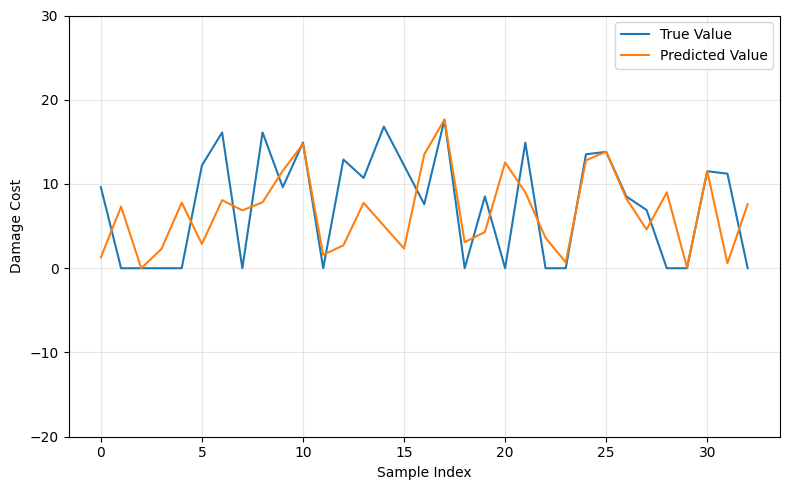

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(y_test_flood.values,  label='True Value')
plt.plot(y_pred_xgb,  label='Predicted Value')
plt.ylim(-20, 30)  
#plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Sample Index')
plt.ylabel('Damage Cost')
#plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [36]:

#joblib.dump(xgb_model, "Models/xgb_tornado_flash_flood.joblib")

# Support Vector Regression

In [37]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

In [38]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf"))
])

svr_ttr = TransformedTargetRegressor(
    regressor=pipe,
    func=np.log1p,
    inverse_func=np.expm1
)

svr_ttr.fit(X_train_scaled_flood, y_train_flood)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('svr', SVR())]))

In [39]:
y_pred = svr_ttr.predict(X_test_scaled_flood)     # already inverse‑transformed
rmse_svr   = np.sqrt(mean_squared_error(y_test_flood, y_pred))
r2_svr     = r2_score(y_test_flood, y_pred)

In [40]:
print(f"SVR  RMSE: {rmse_svr:,.2f}   R²: {r2_svr:.3f}")

SVR  RMSE: 8.52   R²: -0.736


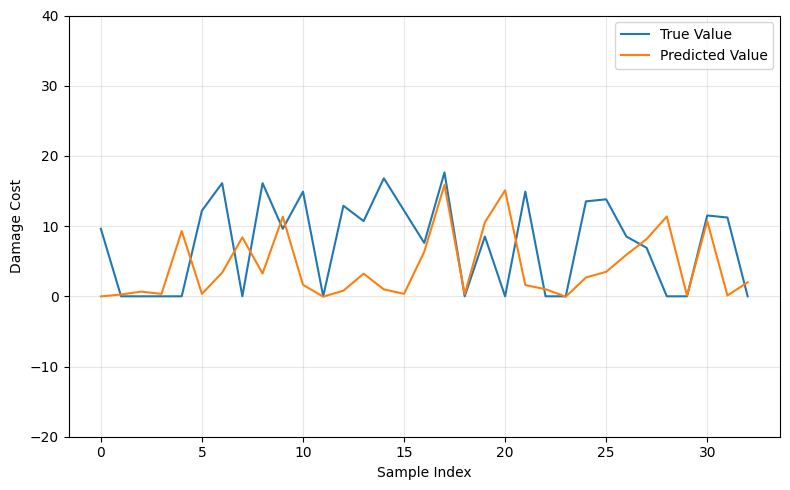

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(y_test_flood.values,  label='True Value')
plt.plot(y_pred,  label='Predicted Value')
plt.ylim(-20, 40)  
#plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Sample Index')
plt.ylabel('Damage Cost')
#plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
joblib.dump(svr_ttr, "Models/svr_pipeline_flash_floods.joblib")

['Models/svr_pipeline_flash_floods.joblib']

# Adaboost Regressor

In [43]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
ada_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ada", AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )),
])

ada_ttr = TransformedTargetRegressor(
    regressor=ada_pipe,
    func=np.log1p,
    inverse_func=np.expm1
)

ada_ttr.fit(X_train_scaled_flood, y_train_flood)
y_pred_ada = ada_ttr.predict(X_test_scaled_flood)   # inverse‑transformed
rmse_ada = np.sqrt(mean_squared_error(y_test_flood, y_pred_ada))
r2_ada   = r2_score(y_test_flood, y_pred_ada)

print(f"AdaBoost   RMSE: {rmse_ada:.2f}   R²: {r2_ada:.3f}")

AdaBoost   RMSE: 7.48   R²: -0.336


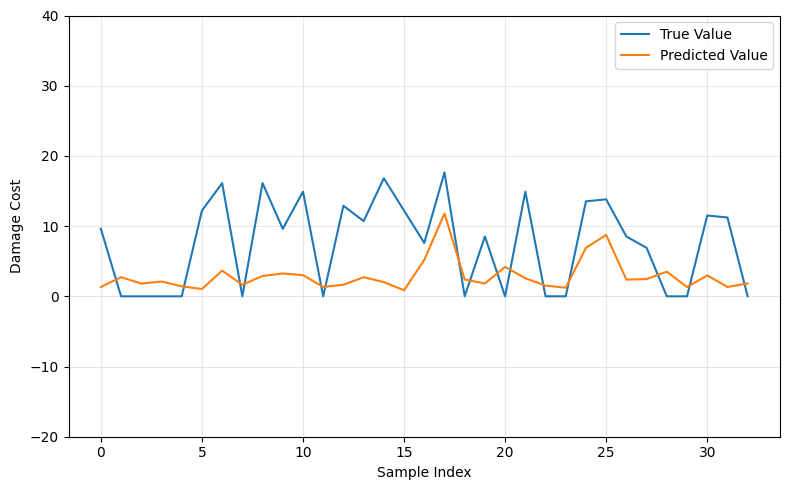

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(y_test_flood.values,  label='True Value')
plt.plot(y_pred_ada,  label='Predicted Value')
plt.ylim(-20, 40)  
#plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Sample Index')
plt.ylabel('Damage Cost')
#plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
#joblib.dump(ada_ttr, "Models/ada_pipeline_flash_floods.joblib")

# KNN Regressor

In [47]:
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(
        n_neighbors=5,
        weights="uniform",
        n_jobs=-1
    )),
])

knn_ttr = TransformedTargetRegressor(
    regressor=knn_pipe,
    func=np.log1p,
    inverse_func=np.expm1
)

knn_ttr.fit(X_train_scaled_flood, y_train_flood)
y_pred_knn = knn_ttr.predict(X_test_scaled_flood)  # inverse‑transformed
rmse_knn = np.sqrt(mean_squared_error(y_test_flood, y_pred_knn))
r2_knn   = r2_score(y_test_flood, y_pred_knn)

print(f"KNN        RMSE: {rmse_knn:.2f}   R²: {r2_knn:.3f}")

KNN        RMSE: 8.82   R²: -0.861


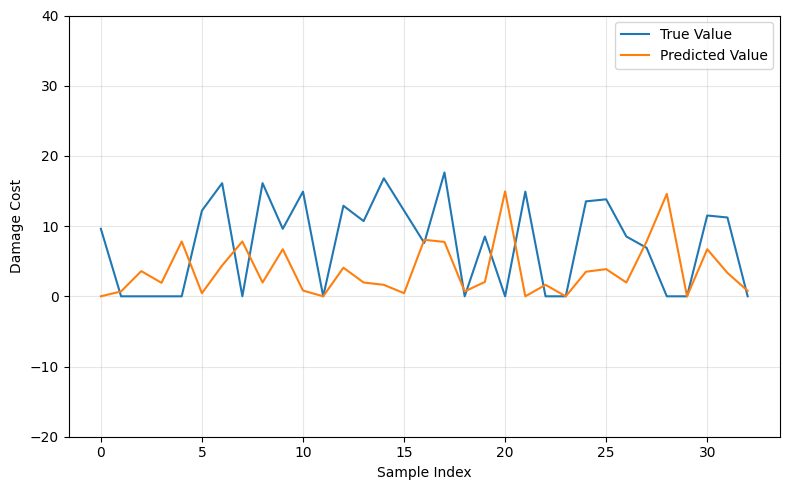

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(y_test_flood.values,  label='True Value')
plt.plot(y_pred_knn,  label='Predicted Value')
plt.ylim(-20, 40)  
#plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Sample Index')
plt.ylabel('Damage Cost')
#plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()